In [1]:
#r "nuget:ScottPlot, 5.0.*"

Installed Packages ScottPlot, 5.0.55

Loading extensions from `/home/michael/.nuget/packages/skiasharp/2.88.9/interactive-extensions/dotnet/SkiaSharp.DotNet.Interactive.dll`

In [2]:
using Microsoft.DotNet.Interactive.Formatting;
using System.Text.Json;
using System.Drawing;
using ScottPlot;
using System.IO;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(400, 300)), HtmlFormatter.MimeType);




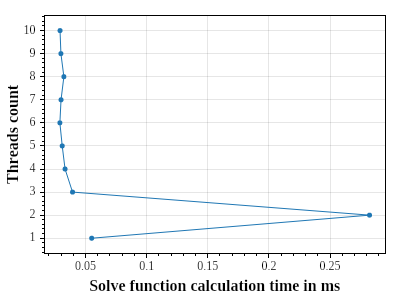

In [7]:
string json = File.ReadAllText("outputData.json");

public class OutputData
{
    public int[] ThreadsCount { get; set; }
    public double[] Timings { get; set; }
}

OutputData outputData = JsonSerializer.Deserialize<OutputData>(json);
int[] threadsCount = outputData.ThreadsCount;
double[] timings = outputData.Timings;

var plot = new ScottPlot.Plot();
plot.Add.Scatter(timings, threadsCount.Select(x => (double)x).ToArray());
plot.XLabel("Solve function calculation time in ms");
plot.YLabel("Threads count");
plot.SavePng("./result.png", 400, 400);

plot